In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import operator
from collections import Counter

In [2]:
# import data to data frame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Training set has 891 rows and test set has 418 rows.

Training set have 12 features and test set have 11 features if Loan_ID isn't count.

One extra feature in the training set is Survived feature, which is the class of a row.

In [4]:
print('Number of Training Examples = {}'.format(train.shape[0]))
print('Number of Test Examples = {}\n'.format(test.shape[0]))
print('Training X Shape = {}'.format(train.shape))
print('Test X Shape = {}\n'.format(test.shape))

print(train.columns)
print(test.columns)

Number of Training Examples = 614
Number of Test Examples = 367

Training X Shape = (614, 13)
Test X Shape = (367, 12)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


#### Data information , statistics describe and number of missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
# map Loan_Status to binary class in new column
train['Loan_Stat_code'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
train.drop('Loan_Status',axis=1,inplace = True)

## Find outliers features
    from 4 number type that is  ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term

In [12]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [13]:
outl_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

outliers = detect_outliers(train,1,outl_col)

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


train have no 2 or more outliers feature

# Data Visualization

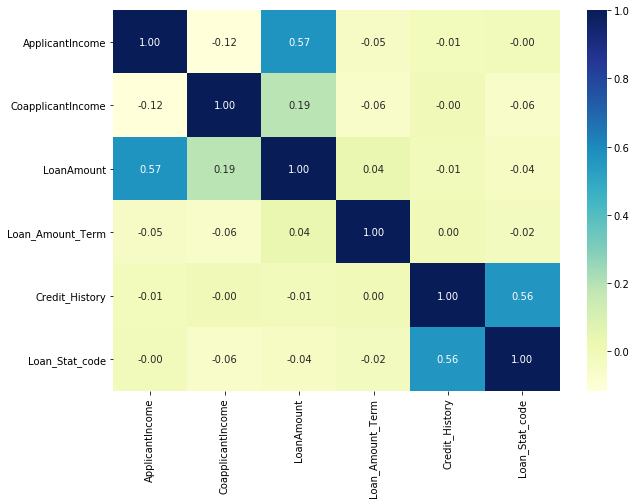

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True, fmt = ".2f",cmap="YlGnBu")


Besides Credit_History , the others features have no significant correlation with Loan_Stat_code.
So, we need features engineering.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1FC717630>,
      dtype=object)

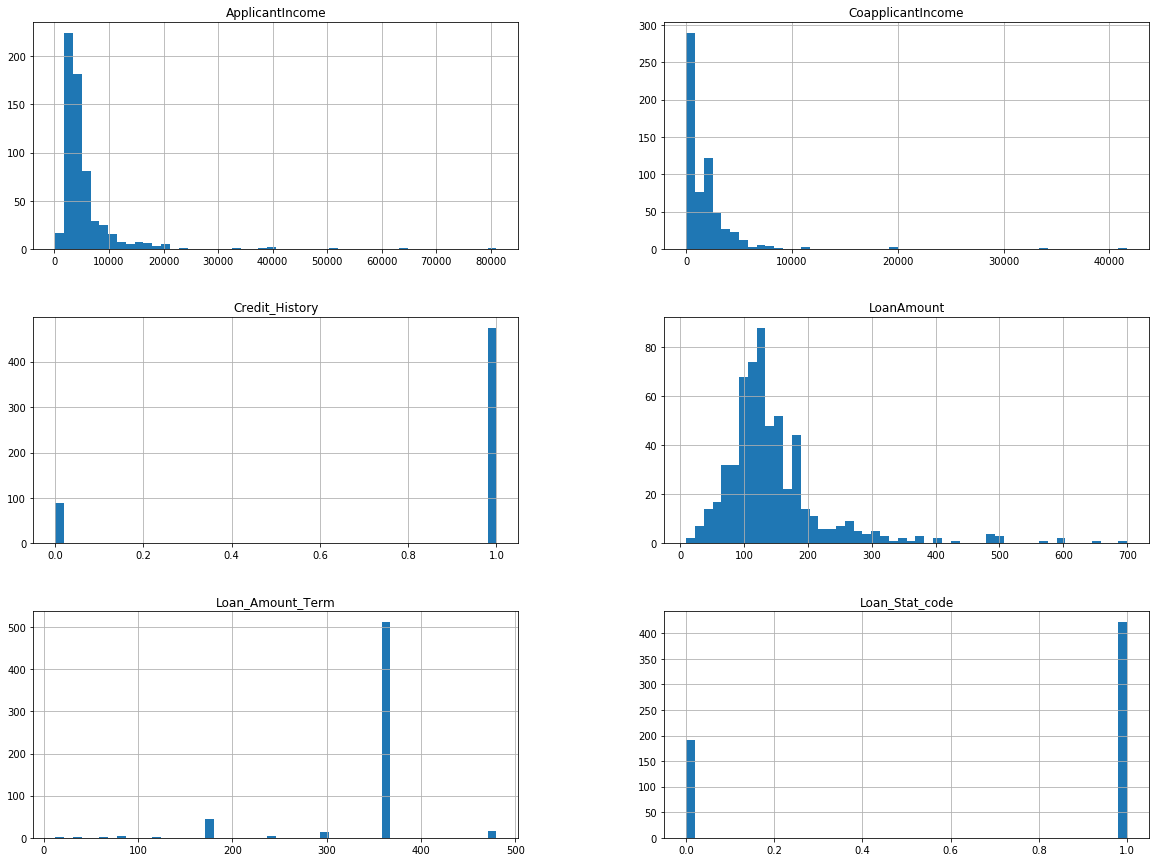

In [15]:
train.hist(bins=50,figsize=(20,15))

Female
 1    66.964286
0    33.035714
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Male
 1    69.325153
0    30.674847
Name: Loan_Stat_code, dtype: float64


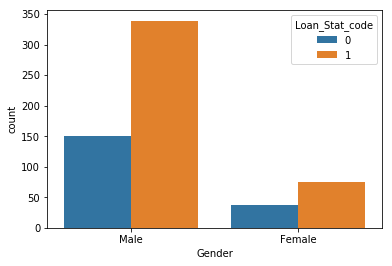

In [16]:
sns.countplot(x='Gender',hue='Loan_Stat_code',data=train)

print('Female\n',train['Loan_Stat_code'][train["Gender"]=='Female'].value_counts(normalize=True)*100)
print('-'*60)
print('Male\n',train['Loan_Stat_code'][train["Gender"]=='Male'].value_counts(normalize=True)*100)

Married
 1    71.60804
0    28.39196
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Not Married
 1    62.910798
0    37.089202
Name: Loan_Stat_code, dtype: float64


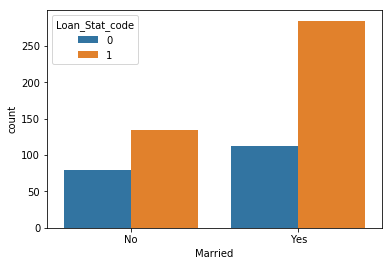

In [17]:
sns.countplot(x='Married',hue='Loan_Stat_code',data=train)

print('Married\n',train['Loan_Stat_code'][train['Married']=='Yes'].value_counts(normalize=True)*100)
print('-'*60)
print('Not Married\n',train['Loan_Stat_code'][train['Married']=='No'].value_counts(normalize=True)*100)

Independent
 1    68.985507
0    31.014493
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
1 Dependent
 1    64.705882
0    35.294118
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
2 Dependent
 1    75.247525
0    24.752475
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
3+ Dependent
 1    64.705882
0    35.294118
Name: Loan_Stat_code, dtype: float64


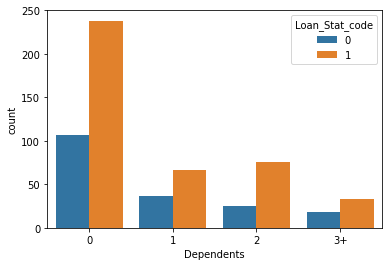

In [18]:
sns.countplot(x='Dependents',hue='Loan_Stat_code',data=train)


print('Independent\n',train['Loan_Stat_code'][train['Dependents']=='0'].value_counts(normalize=True)*100)
print('-'*60)
print('1 Dependent\n',train['Loan_Stat_code'][train['Dependents']=='1'].value_counts(normalize=True)*100)
print('-'*60)
print('2 Dependent\n',train['Loan_Stat_code'][train['Dependents']=='2'].value_counts(normalize=True)*100)
print('-'*60)
print('3+ Dependent\n',train['Loan_Stat_code'][train['Dependents']=='3+'].value_counts(normalize=True)*100)

In [19]:
# But if we do this 
print('Independent\n',train['Loan_Stat_code'][train['Dependents']=='0'].value_counts(normalize=True)*100)
print('-'*60)
print('Dependent\n',train['Loan_Stat_code'][train['Dependents'] !='0'].value_counts(normalize=True)*100)
print('-'*60)

Independent
 1    68.985507
0    31.014493
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Dependent
 1    68.401487
0    31.598513
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------


Graduate
 1    70.833333
0    29.166667
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Not Graduate
 1    61.19403
0    38.80597
Name: Loan_Stat_code, dtype: float64


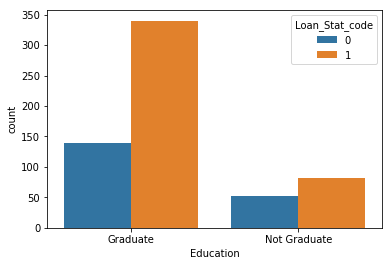

In [20]:
sns.countplot(x='Education',hue='Loan_Stat_code',data=train)

print('Graduate\n',train['Loan_Stat_code'][train['Education']=='Graduate'].value_counts(normalize=True)*100)
print('-'*60)
print('Not Graduate\n',train['Loan_Stat_code'][train['Education']=='Not Graduate'].value_counts(normalize=True)*100)

Self_Employed
 1    68.292683
0    31.707317
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Not Self_Employed
 1    68.6
0    31.4
Name: Loan_Stat_code, dtype: float64


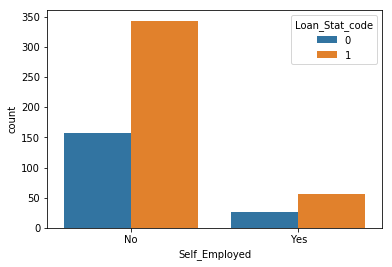

In [21]:
sns.countplot(x='Self_Employed',hue='Loan_Stat_code',data=train)

print('Self_Employed\n',train['Loan_Stat_code'][train['Self_Employed']=='Yes'].value_counts(normalize=True)*100)
print('-'*60)
print('Not Self_Employed\n',train['Loan_Stat_code'][train['Self_Employed']=='No'].value_counts(normalize=True)*100)

Have a Credit History before 
 1    79.578947
0    20.421053
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Have not a Credit History before
 0    92.134831
1     7.865169
Name: Loan_Stat_code, dtype: float64


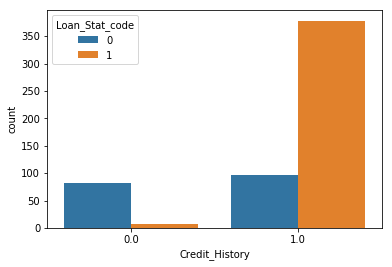

In [22]:
sns.countplot(x='Credit_History',hue='Loan_Stat_code',data=train)

print('Have a Credit History before \n',train['Loan_Stat_code'][train['Credit_History']==1].value_counts(normalize=True)*100)
print('-'*60)
print('Have not a Credit History before\n',train['Loan_Stat_code'][train['Credit_History']==0].value_counts(normalize=True)*100)

Urban 
 1    65.841584
0    34.158416
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Semiurban
 1    76.824034
0    23.175966
Name: Loan_Stat_code, dtype: float64
------------------------------------------------------------
Rural
 1    61.452514
0    38.547486
Name: Loan_Stat_code, dtype: float64


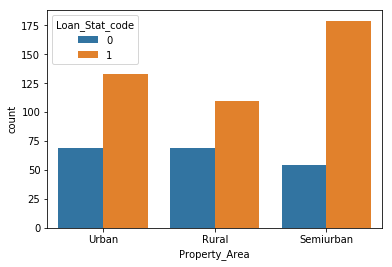

In [23]:
sns.countplot(x='Property_Area',hue='Loan_Stat_code',data=train)

print('Urban \n',train['Loan_Stat_code'][train['Property_Area']=='Urban'].value_counts(normalize=True)*100)
print('-'*60)
print('Semiurban\n',train['Loan_Stat_code'][train['Property_Area']=='Semiurban'].value_counts(normalize=True)*100)
print('-'*60)
print('Rural\n',train['Loan_Stat_code'][train['Property_Area']=='Rural'].value_counts(normalize=True)*100)

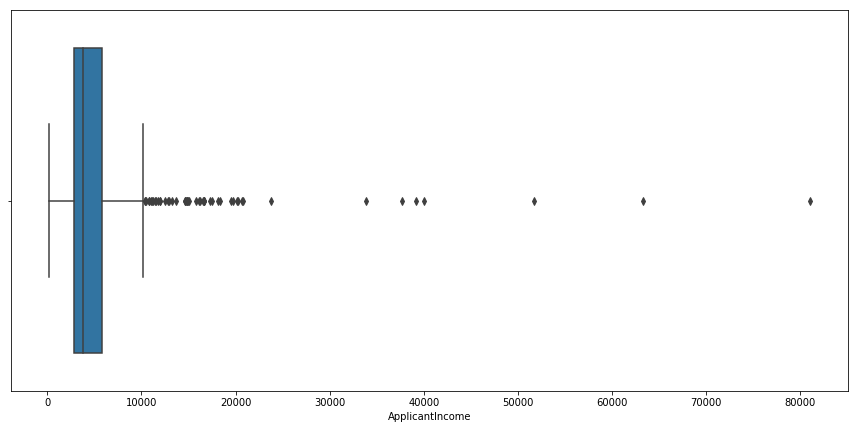

In [24]:
plt.subplots(figsize=(15, 7))
sns.boxplot(x='ApplicantIncome',data=train)

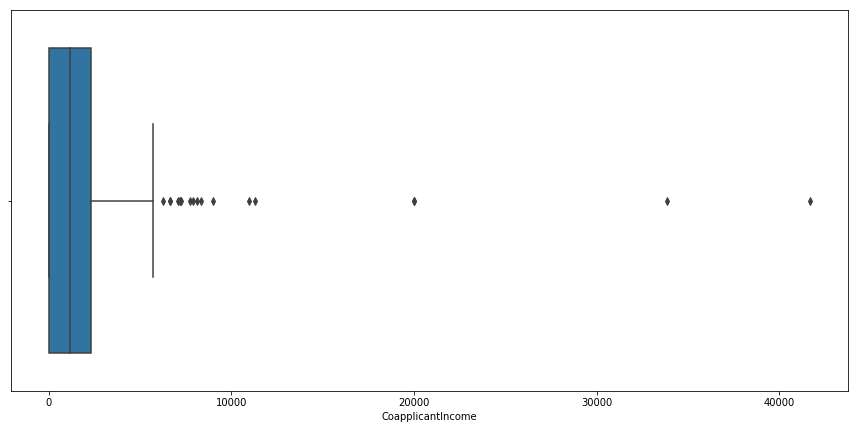

In [25]:
plt.subplots(figsize=(15, 7))
sns.boxplot(x='CoapplicantIncome',data=train)

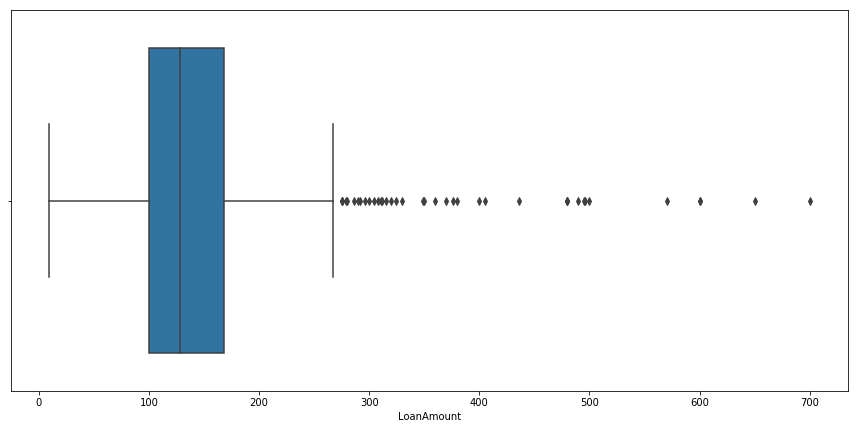

In [26]:
plt.subplots(figsize=(15, 7))
sns.boxplot(x='LoanAmount',data=train)

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

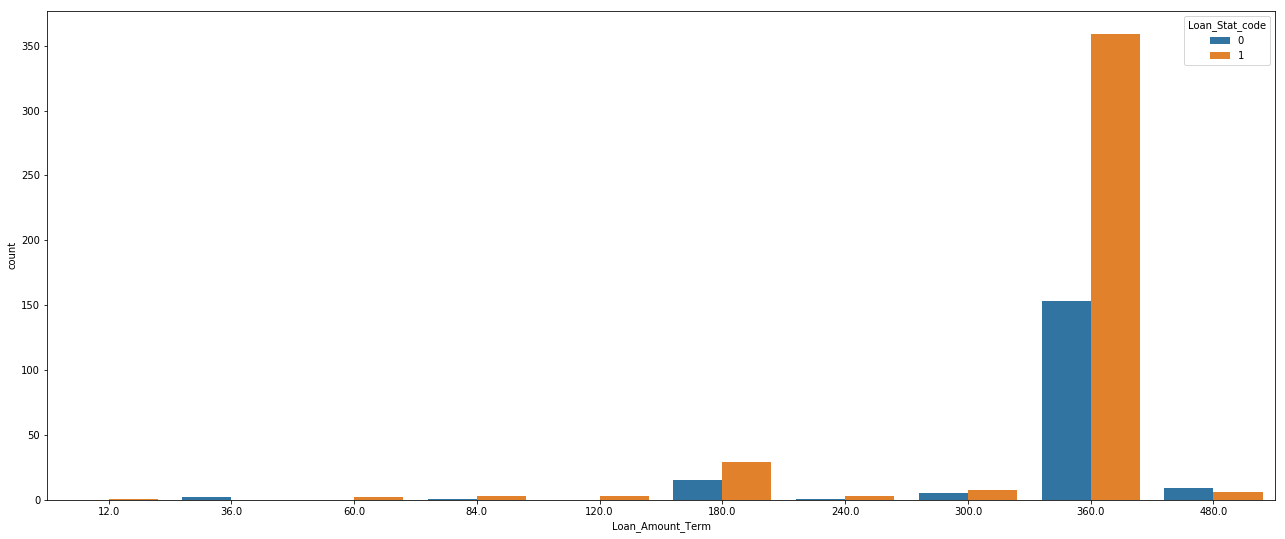

In [28]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Stat_code', data=train)

In [29]:
print('more than 360 days for Loan\n', train['Loan_Stat_code'][train['Loan_Amount_Term'] > 360].value_counts(normalize=True)*100)
print('-'*30)
print('less than 360 days for Loan\n', train['Loan_Stat_code'][train['Loan_Amount_Term'] <= 360].value_counts(normalize=True)*100)

more than 360 days for Loan
 0    60.0
1    40.0
Name: Loan_Stat_code, dtype: float64
------------------------------
less than 360 days for Loan
 1    69.74359
0    30.25641
Name: Loan_Stat_code, dtype: float64


In [30]:
train.drop(['Loan_ID','Gender','Self_Employed','Married'],axis=1,inplace=True)
test.drop(['Loan_ID','Gender','Self_Employed','Married'],axis=1,inplace=True)

In [31]:
def fill_missing_values_str(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)

In [32]:
fill_missing_values_str(train)
fill_missing_values_str(test)

In [33]:
def fill_nums(df,features):
    for item in features:
        df[item].fillna(df[item].median(),inplace=True)    

In [34]:
fill_nums(train,['LoanAmount','Loan_Amount_Term'])
fill_nums(test,['LoanAmount','Loan_Amount_Term'])

In [35]:
train.isnull().sum()

Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Stat_code        0
dtype: int64

In [36]:
test.isnull().sum()

Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
train['TotalIncome'] = train['CoapplicantIncome'] + train['ApplicantIncome']
test['TotalIncome'] = test['CoapplicantIncome'] + test['ApplicantIncome']

In [38]:
train.loc[train['Loan_Amount_Term'] <= 360 , 'Loan_Period'] = 'Short'
train.loc[train['Loan_Amount_Term'] > 360 , 'Loan_Period'] = 'Long'

test.loc[test['Loan_Amount_Term'] <= 360 , 'Loan_Period'] = 'Short'
test.loc[test['Loan_Amount_Term'] > 360 , 'Loan_Period'] = 'Long'

In [39]:
train.loc[train['ApplicantIncome'] <= train['CoapplicantIncome'] , 'Selfloan'] = 0
train.loc[train['ApplicantIncome'] > train['CoapplicantIncome'] , 'Selfloan'] = 1

test.loc[test['ApplicantIncome'] <= test['CoapplicantIncome'] , 'Selfloan'] = 0
test.loc[test['ApplicantIncome'] > test['CoapplicantIncome'] , 'Selfloan'] = 1

In [40]:
train.loc[train['Selfloan'] == 1 , 'Loan/Income'] = train['LoanAmount']/train['ApplicantIncome']
train.loc[train['Selfloan'] == 0 , 'Loan/Income'] = train['LoanAmount']/train['TotalIncome']

test.loc[test['Selfloan'] == 1 , 'Loan/Income'] = test['LoanAmount']/test['ApplicantIncome']
test.loc[test['Selfloan'] == 0 , 'Loan/Income'] = test['LoanAmount']/test['TotalIncome']

In [41]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Stat_code,TotalIncome,Loan_Period,Selfloan,Loan/Income
0,0,Graduate,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,Short,1.0,0.021884
1,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,Short,1.0,0.027929
2,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Short,1.0,0.022000
3,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,Short,1.0,0.046458
4,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,Short,1.0,0.023500


In [42]:
print("=========== Missing Values Train =============")
print(train.isnull().sum())
print("=========== Missing Values Test =============")
print(test.isnull().sum())

=========== Missing Values Train =============
Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Stat_code        0
TotalIncome           0
Loan_Period           0
Selfloan              0
Loan/Income           0
dtype: int64
=========== Missing Values Test =============
Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
TotalIncome           0
Loan_Period           0
Selfloan              0
Loan/Income           0
dtype: int64


In [43]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Stat_code,TotalIncome,Selfloan,Loan/Income
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.014715,-0.004710,0.893037,0.172281,-0.352097
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,-0.002056,-0.059187,0.342781,-0.484427,-0.011446
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.007543,-0.033214,0.620316,-0.023596,0.127071
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.003735,-0.022549,-0.070917,0.026261,0.156509
Credit_History,-0.014715,-0.002056,-0.007543,-0.003735,1.000000,0.561678,-0.015109,0.044480,-0.029159
Loan_Stat_code,-0.004710,-0.059187,-0.033214,-0.022549,0.561678,1.000000,-0.031271,0.034437,-0.009187
TotalIncome,0.893037,0.342781,0.620316,-0.070917,-0.015109,-0.031271,1.000000,-0.056526,-0.338223
Selfloan,0.172281,-0.484427,-0.023596,0.026261,0.044480,0.034437,-0.056526,1.000000,0.199514
Loan/Income,-0.352097,-0.011446,0.127071,0.156509,-0.029159,-0.009187,-0.338223,0.199514,1.000000


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [45]:
def acc_ch(model,x,y):
    folds = StratifiedKFold(n_splits=5, random_state=42)
    accuracy = np.mean(cross_val_score(model, x, y, scoring="accuracy", cv=folds, n_jobs=-1))
    return accuracy

In [46]:
rf = RandomForestClassifier(n_estimators=500, max_depth=25, 
                                min_samples_split=2, min_samples_leaf=2,
                                max_features="log2", random_state=12)
    
    
log_reg = LogisticRegression(C=5, penalty='l2',random_state=42)
    
lda = LinearDiscriminantAnalysis(solver='lsqr')
    
lgbm = LGBMClassifier(num_leaves=31, learning_rate=0.1, 
                      n_estimators=64, random_state=42, n_jobs=-1)
xgb = XGBClassifier(max_depth=5, learning_rate=0.02, n_jobs=-1, nthread=-1, 
                    gamma=0.06, min_child_weight=5, 
                    subsample=1, colsample_bytree=0.9, 
                    reg_alpha=0, reg_lambda=0.01, 
                    random_state=42)

In [47]:

def fill_ch(df,features):
    
    df_ch = df.dropna()
    X_ch = df_ch[features]
    y_ch = df_ch['Credit_History']
    
    pred = df[df['Credit_History'].isnull()]
    pred = pred[features]
    
    rf.fit(X_ch, y_ch)
    
    new_Credit_History = rf.predict(pred)
    return new_Credit_History

In [48]:
train.columns

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Stat_code', 'TotalIncome', 'Loan_Period', 'Selfloan',
       'Loan/Income'],
      dtype='object')

In [49]:
features = ['Selfloan','Loan/Income']

In [50]:
train_ch = fill_ch(train,features)
train_ch

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
test_ch = fill_ch(test,features)
test_ch

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [52]:
train_ch_index = train.loc[train['Credit_History'].isnull()].index
test_ch_index = test.loc[test['Credit_History'].isnull()].index

In [53]:
series_train = pd.Series(train_ch , index=train_ch_index)
series_test = pd.Series(test_ch , index=test_ch_index)

In [54]:
train['Credit_History'].fillna(series_train,inplace=True)
test['Credit_History'].fillna(series_test,inplace=True)

In [55]:
print("=========== Missing Values Train =============")
print(train.isnull().sum())
print("=========== Missing Values Test =============")
print(test.isnull().sum())

=========== Missing Values Train =============
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Stat_code       0
TotalIncome          0
Loan_Period          0
Selfloan             0
Loan/Income          0
dtype: int64
=========== Missing Values Test =============
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Loan_Period          0
Selfloan             0
Loan/Income          0
dtype: int64


In [56]:
dummy_col = ['Dependents', 'Education', 'Property_Area', 'Loan_Period']
train = pd.get_dummies(train, columns=dummy_col , prefix='', prefix_sep='')
test = pd.get_dummies(test, columns=dummy_col, prefix='', prefix_sep='')

In [57]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Stat_code,TotalIncome,Selfloan,Loan/Income,0,1,2,3+,Graduate,Not Graduate,Rural,Semiurban,Urban,Long,Short
0,5849,0.0,128.0,360.0,1.0,1,5849.0,1.0,0.021884,1,0,0,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,1.0,0.027929,0,1,0,0,1,0,1,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,3000.0,1.0,0.022000,1,0,0,0,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,1.0,0.046458,1,0,0,0,0,1,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,1,6000.0,1.0,0.023500,1,0,0,0,1,0,0,0,1,0,1


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Stat_code       614 non-null int64
TotalIncome          614 non-null float64
Selfloan             614 non-null float64
Loan/Income          614 non-null float64
0                    614 non-null uint8
1                    614 non-null uint8
2                    614 non-null uint8
3+                   614 non-null uint8
Graduate             614 non-null uint8
Not Graduate         614 non-null uint8
Rural                614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Long                 614 non-null uint8
Short                614 non-null uint8
dtypes: float64(7), int64(2), uint8(11)
memory usage: 49.8 KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 19 columns):
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
TotalIncome          367 non-null int64
Selfloan             367 non-null float64
Loan/Income          367 non-null float64
0                    367 non-null uint8
1                    367 non-null uint8
2                    367 non-null uint8
3+                   367 non-null uint8
Graduate             367 non-null uint8
Not Graduate         367 non-null uint8
Rural                367 non-null uint8
Semiurban            367 non-null uint8
Urban                367 non-null uint8
Long                 367 non-null uint8
Short                367 non-null uint8
dtypes: float64(5), int64(3), uint8(11)
memory usage: 27.0 KB


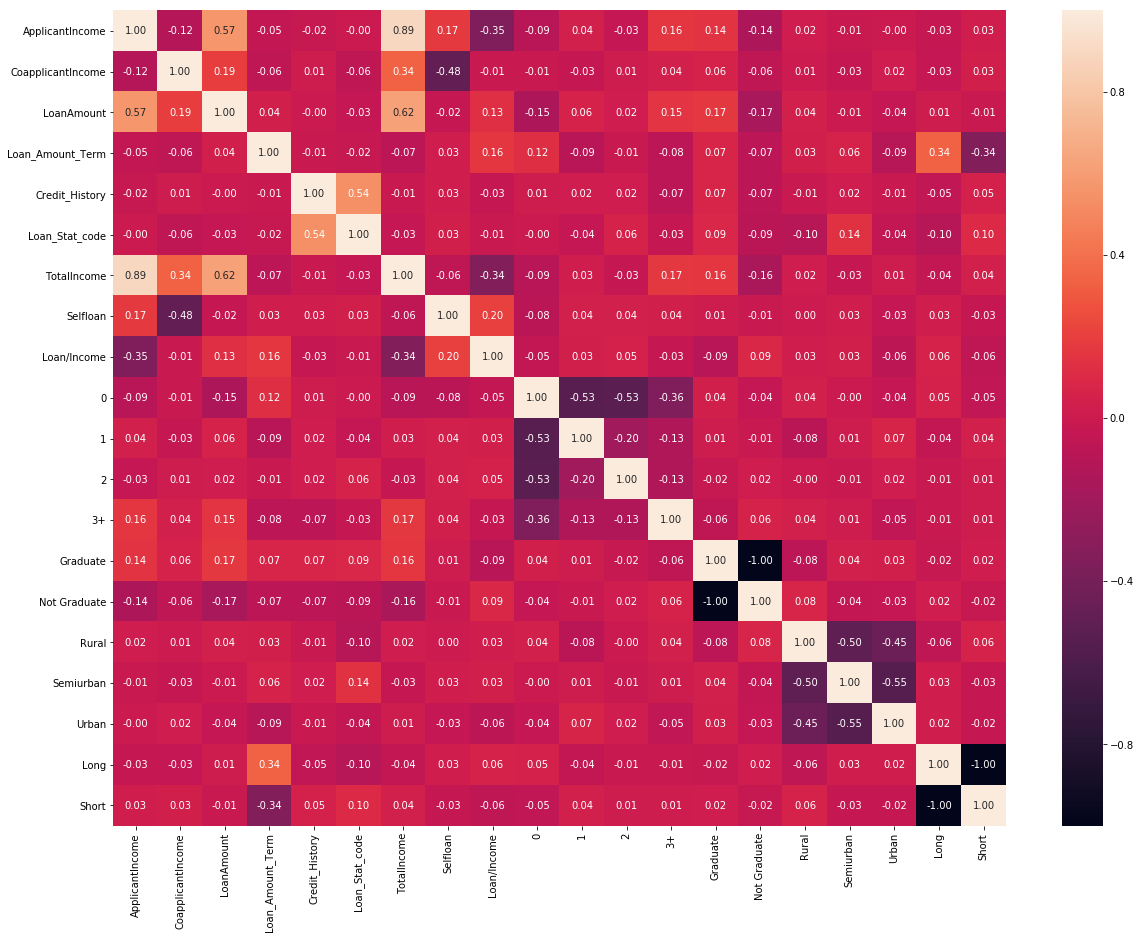

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True, fmt = ".2f")

In [61]:
# Seperate out feature and target variables
y = train['Loan_Stat_code']
x = train.drop('Loan_Stat_code', axis=1)

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
1   CoapplicantIncome  11342.041603
5         TotalIncome   3559.550362
0     ApplicantIncome     93.904964
2          LoanAmount     32.821655
4      Credit_History     26.935419
15          Semiurban      7.103093
17               Long      5.760693
14              Rural      4.410584
3    Loan_Amount_Term      3.778554
13       Not Graduate      3.540502


[0.11299924 0.0868123  0.1235876  0.03554829 0.26844717 0.12251348
 0.01393402 0.1168516  0.01795802 0.01574321 0.01443014 0.01132278
 0.01272546 0.00858054 0.01100316 0.01108522 0.0071053  0.00619392
 0.00315856]


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


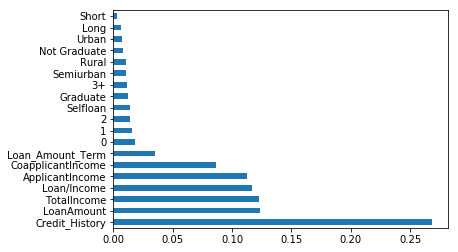

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
                                #plot graph of feature importances for better visualization
    
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

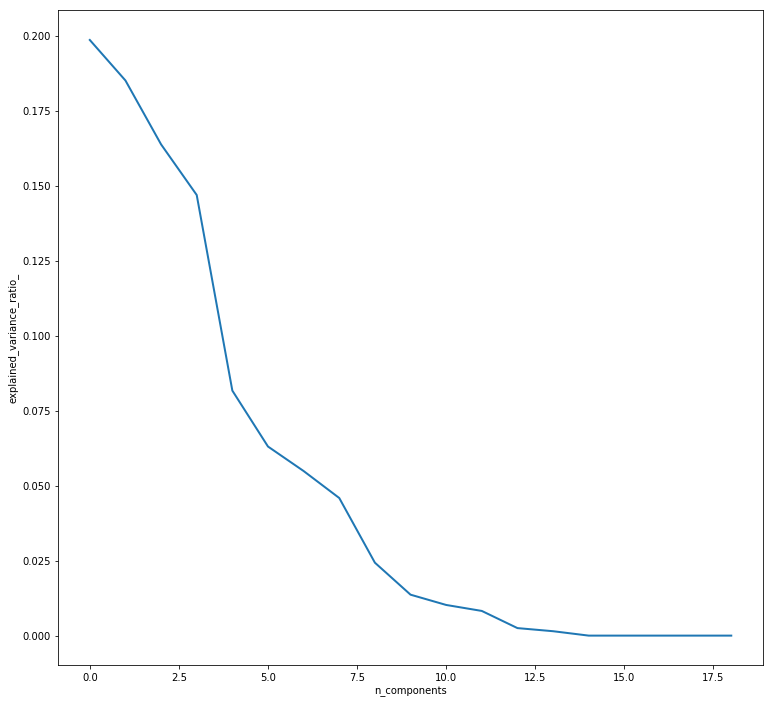

In [64]:
# split data train 70 % and test 30 %
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [65]:
x.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis=1,inplace=True)

# Prediction Model 

In [66]:
old_test = pd.read_csv('test.csv')

In [67]:
def acc(model):
    folds = StratifiedKFold(n_splits=5, random_state=42)
    accuracy = np.mean(cross_val_score(model, x, y, scoring="accuracy", cv=folds, n_jobs=-1))
    return accuracy

In [68]:
# Validate the model
log_reg_acc = acc(log_reg)
# Fit the best performing model to training data
log_reg.fit(x, y)
print('log_reg accuracy is ',log_reg_acc)
logis_pred = log_reg.predict(test)

log_reg accuracy is  0.801427815970386


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
def submission_convert(result):
    string_submis = []
    for i in range(len(result)):
        if int(result[i]) == 1:
            string_submis.append('Y')
        else:
            string_submis.append('N')
    return string_submis

In [70]:
logis_sub = pd.DataFrame({'Loan_ID':old_test['Loan_ID'], 'Loan_Status': submission_convert(logis_pred)})
logis_sub.to_csv("logis_regress_submission.csv", index=False)

In [71]:
# Validate the model
rf_acc = acc(rf)
# Fit the best performing model to training data
rf.fit(x, y)
print('rf accuracy is ',rf_acc)
rf_pred = rf.predict(test)

rf accuracy is  0.795002644103649


In [72]:
rf_sub = pd.DataFrame({'Loan_ID':old_test['Loan_ID'], 'Loan_Status': submission_convert(rf_pred)})
rf_sub.to_csv("rf_submission.csv", index=False)

In [73]:

lgbm_acc = acc(lgbm)
# Fit the best performing model to training data
lgbm.fit(x, y)
print('lgbm accuracy is ',lgbm_acc)

lgbm accuracy is  0.781835007932311


In [74]:
lgbm_pred = lgbm.predict(test)
lgbm_sub = pd.DataFrame({'Loan_ID':old_test['Loan_ID'], 'Loan_Status': submission_convert(lgbm_pred)})
lgbm_sub.to_csv("lgbm_submission.csv", index=False)

In [75]:
# Validate the model
xgb_acc = acc(xgb)
# Fit the best performing model to training data
xgb.fit(x, y)
print('xgb accuracy is ' , xgb_acc)

xgb accuracy is  0.8128239026969858


In [76]:
xgb_pred = xgb.predict(test)
xgb_sub = pd.DataFrame({'Loan_ID':old_test['Loan_ID'], 'Loan_Status': submission_convert(xgb_pred)})
xgb_sub.to_csv("xgb_submission.csv", index=False)